In [ ]:
#Using the olympics data from the previous weeks assignment, create a histogram of total medals 
#and a medal count pie chart of the top ten countries.  

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [25]:
df = pd.read_csv(r'C:\Users\jamha\OneDrive\Desktop\CISPROG\CISPROG-6\olympics.csv', index_col=0, skiprows=1)
#pd.set_option('display.max_columns', None)

#renaming the columns so that its easier to read 
for col in df.columns:
    if col[:2]=='01':
        df.rename(columns={col:'Gold'+ col[4:]}, inplace=True)
    if col[:2]=='02':
        df.rename(columns={col:'Silver'+ col[4:]}, inplace=True)
    if col[:2]=='03':
        df.rename(columns={col:'Bronze'+ col[4:]}, inplace=True)
    if col[:1]=='№':
        df.rename(columns={col:'#'+ col[1:]}, inplace=True)
        
# To retrieve the abbreviated form of each country (ID)
ids=df.index.str.split('\s\(') #split the index by "("
df.index=ids.str[0] #[0] element is the name of the country (new index)
df['ID']=ids.str[1].str[:3] #takes first 3 letters



df = df.drop('Totals') # calculating total columns
#pd.set_option('display.max_rows', 500) 
#pd
df.head() #shows the table

,? Summer,Gold,Silver,Bronze,Total,? Winter,Gold.1,Silver.1,Bronze.1,Total.1,? Games,Gold.2,Silver.2,Bronze.2,Combined total,ID
Countries,,,,,,,,,,,,,,,,
Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2,AFG
Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15,ALG
Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70,ARG
Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12,ARM
Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12,ANZ


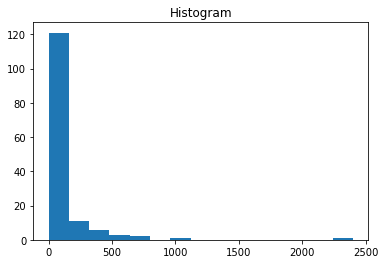

In [26]:
#histogram of total medals
plt.hist(df['Total'][:-1],bins=15)
plt.title('Histogram')

plt.show()

In [27]:
#the medal count for the top ten countries
df = df.sort_values(by=['Total'], ascending=False)
df.nlargest(10, 'Total') #shows top 10 

,? Summer,Gold,Silver,Bronze,Total,? Winter,Gold.1,Silver.1,Bronze.1,Total.1,? Games,Gold.2,Silver.2,Bronze.2,Combined total,ID
Countries,,,,,,,,,,,,,,,,
United States,26,976,757,666,2399,22,96,102,84,282,48,1072,859,750,2681,USA
Soviet Union,9,395,319,296,1010,9,78,57,59,194,18,473,376,355,1204,URS
Great Britain,27,236,272,272,780,22,10,4,12,26,49,246,276,284,806,GBR
France,27,202,223,246,671,22,31,31,47,109,49,233,254,293,780,FRA
Germany,15,174,182,217,573,11,78,78,53,209,26,252,260,270,782,GER
Italy,26,198,166,185,549,22,37,34,43,114,48,235,200,228,663,ITA
Sweden,26,143,164,176,483,22,50,40,54,144,48,193,204,230,627,SWE
Hungary,25,167,144,165,476,22,0,2,4,6,47,167,146,169,482,HUN
China,9,201,146,126,473,10,12,22,19,53,19,213,168,145,526,CHN


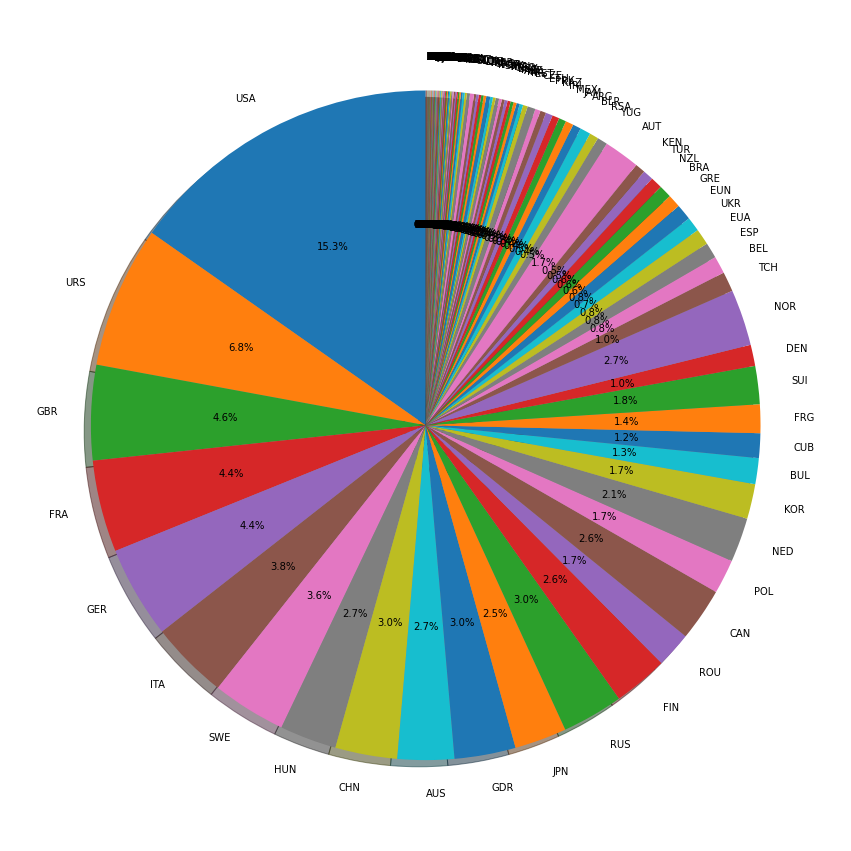

In [60]:
fig = plt.figure(figsize =(15, 150))
plt.pie(df['Combined total'], labels= df['ID'], autopct='%1.1f%%', shadow=True, startangle=90)   # only skipping the first row
plt.show()
